In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# total mortality over people infected with MRSA
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

In [8]:
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [9]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

In [10]:
monthlymort = pd.DataFrame({"monthly infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278) })

In [11]:
monthlymort

,monthly infection,7 day mortality,30 day mortality
0,872,207,385
1,758,176,318
2,808,184,332
3,789,162,299
4,757,148,287
5,741,143,292
6,785,147,281
7,731,123,235
8,650,115,231
9,681,133,259


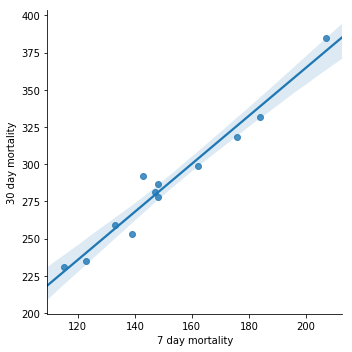

In [12]:
sns.lmplot(x="7 day mortality", y="30 day mortality", data=monthlymort)

In [13]:
monthlymort.sum()

monthly infection    9001
7 day mortality      1825
30 day mortality     3450
dtype: int64

In [14]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [18]:
ageMort = pd.DataFrame({"Age Group": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "No of Patients": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age Group,No of Patients,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [ ]:
# Fake data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

In [ ]:
infection.sum()

In [ ]:
infection.describe()